In [127]:
# Import libraries

# Data analysis and wrangling
import pandas as pd
import numpy as np

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

# To have plot inline with jupyter notebook
% matplotlib inline

# Import Default dictionary
from collections import defaultdict

# Machine Learning models

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

# Naive-Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Support Vector classifier
from sklearn.svm import NuSVC

# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


# Cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [128]:
# Load training and test dataset
df_titan_train = pd.read_csv("Titanic/df_train.csv")
df_titan_test = pd.read_csv("Titanic/df_test.csv")

In [129]:
# Get basic information from both the datasets
print('_'*40)
print('Training Dataset')
df_titan_train.info()
print('_'*40)
print('_'*40)
print('Test Dataset')
df_titan_test.info()

________________________________________
Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
PassengerId               891 non-null int64
Survived                  891 non-null int64
Pclass_1                  891 non-null int64
Pclass_2                  891 non-null int64
Pclass_3                  891 non-null int64
Embarked_C                891 non-null int64
Embarked_Q                891 non-null int64
Embarked_S                891 non-null int64
Sex_title_female Miss.    891 non-null int64
Sex_title_female Mrs.     891 non-null int64
Sex_title_female rare     891 non-null int64
Sex_title_male Master.    891 non-null int64
Sex_title_male Mr.        891 non-null int64
Sex_title_male rare       891 non-null int64
Agegrp_0                  891 non-null int64
Agegrp_1                  891 non-null int64
Agegrp_2                  891 non-null int64
Agegrp_3                  891 non-null int64
Agegrp_4                  8

In [130]:
# Features and labels
features = df_titan_test.columns
label = 'Survived'
print("Features :{} \n\nLabels :{}".format(features,label))

Features :Index(['PassengerId', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_title_female Miss.',
       'Sex_title_female Mrs.', 'Sex_title_female rare',
       'Sex_title_male Master.', 'Sex_title_male Mr.', 'Sex_title_male rare',
       'Agegrp_0', 'Agegrp_1', 'Agegrp_2', 'Agegrp_3', 'Agegrp_4', 'Agegrp_5',
       'Sibsize_0', 'Sibsize_1', 'Sibsize_2', 'Sibsize_3', 'Parsize_0',
       'Parsize_1', 'Parsize_2', 'Faregrp_0', 'Faregrp_1', 'Faregrp_2',
       'Faregrp_3', 'Faregrp_4', 'Faregrp_5'],
      dtype='object') 

Labels :Survived


In [131]:
# Features required for model
model_features = features[1:]
model_features

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_title_female Miss.', 'Sex_title_female Mrs.',
       'Sex_title_female rare', 'Sex_title_male Master.', 'Sex_title_male Mr.',
       'Sex_title_male rare', 'Agegrp_0', 'Agegrp_1', 'Agegrp_2', 'Agegrp_3',
       'Agegrp_4', 'Agegrp_5', 'Sibsize_0', 'Sibsize_1', 'Sibsize_2',
       'Sibsize_3', 'Parsize_0', 'Parsize_1', 'Parsize_2', 'Faregrp_0',
       'Faregrp_1', 'Faregrp_2', 'Faregrp_3', 'Faregrp_4', 'Faregrp_5'],
      dtype='object')

In [132]:
# Model - train, test and predict
def classifier(X, Y, mod, params, mode = 'train') :
    
    if mode == 'train' :
        if params == None :
            model = mod()
        else :
            model = mod(**params)
        Info = model.fit(X,Y)
    elif mode == 'test' or mode == 'predict' :
        model = mod
        Info = None
        
    Prediction = model.predict(X)
    
    if mode == 'train' or mode == 'test' :
        Accuracy = round(model.score(X,Y)*100,2)        
    elif mode == 'predict' :
        Accuracy = None
    
    return(Info, model, Prediction, Accuracy)    

In [133]:
# Models to test
models = {
          'Logistic Regression' : LogisticRegression ,
          'K-Nearest Neighbour' : KNeighborsClassifier ,
          'Naive Bayes' : GaussianNB ,
          'Decision Tree' : DecisionTreeClassifier ,
          'Support Vector Machine' : NuSVC ,
          'Random Forest Classifier' : RandomForestClassifier
         }

# Model parameters
model_params = {
          'Logistic Regression' : [None] ,
          'K-Nearest Neighbour' : [None, {'n_neighbors' : 3}, {'n_neighbors' : 5}] ,
          'Naive Bayes' : [None] ,
          'Decision Tree' : [None] ,
          'Support Vector Machine' : [None, {'kernel':'linear'}, {'kernel':'poly'}, {'kernel':'sigmoid'}] ,
          'Random Forest Classifier' : [None, {'n_estimators':50},{'n_estimators':100},{'n_estimators':500}]
                }

In [134]:
# Train all the models
X_train = df_titan_train[model_features]
Y_train = df_titan_train[label]
X_test = df_titan_test[model_features]
Info = defaultdict(dict); Model =defaultdict(dict); Train_prediction = defaultdict(dict)
Train_acc = defaultdict(dict);  parameters = defaultdict(dict)
for name, mod in models.items() :    
    for key, params in enumerate(model_params[name]) :             
        parameters[name][key] = params
        Info[name][key], Model[name][key], Train_prediction[name][key], Train_acc[name][key] \
                    = classifier(X_train, Y_train, mod, params, mode ='train')            
        

In [136]:
# Store the accuracy of the model
i=0
df_model_score = pd.DataFrame(columns = ['Name', 'key','Parameters','Info','Train_acc'])
for name, _ in models.items() :    
    for key, params in enumerate(model_params[name]) :      
        df_model_score.loc[i] = [name,key,params,Info[name][key],Train_acc[name][key]]
        i+=1
                                  
# Print the output in the order of Training accuracy
for index, row in df_model_score.sort_values(['Train_acc'],ascending=False).iterrows() :
    print('*'*90)
    print("Model \t\t\t\t : ",row[0])
    print("Parameters passed \t\t : ",row[2])
    print('Training Accuracy \t\t : ',row[4],'%')
    print('Model info \t\t\t : ',row[3])


******************************************************************************************
Model 				 :  Random Forest Classifier
Parameters passed 		 :  {'n_estimators': 50}
Training Accuracy 		 :  89.23 %
Model info 			 :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
******************************************************************************************
Model 				 :  Random Forest Classifier
Parameters passed 		 :  {'n_estimators': 100}
Training Accuracy 		 :  89.23 %
Model info 			 :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max

In [137]:
# Se all the output in tabular form (in the order of training data accuracy)
df_model_score.sort_values(['Train_acc'],ascending=False).iloc[:,[0,1,2,4]]

,Name,key,Parameters,Train_acc
4,Random Forest Classifier,1,{'n_estimators': 50},89.23
5,Random Forest Classifier,2,{'n_estimators': 100},89.23
6,Random Forest Classifier,3,{'n_estimators': 500},89.23
11,Decision Tree,0,None,89.23
3,Random Forest Classifier,0,None,89.11
1,K-Nearest Neighbour,1,{'n_neighbors': 3},85.19
0,K-Nearest Neighbour,0,None,83.84
2,K-Nearest Neighbour,2,{'n_neighbors': 5},83.84
9,Support Vector Machine,2,{'kernel': 'poly'},83.73
12,Logistic Regression,0,None,82.94


In [139]:
# Lets pick 5 models 
Indexes = [4,11,1,9,12] 
df_model_score.loc[Indexes,['Name']]

,Name
4,Random Forest Classifier
11,Decision Tree
1,K-Nearest Neighbour
9,Support Vector Machine
12,Logistic Regression


In [140]:
# We will now do cross validation
kfld = StratifiedKFold(n_splits=10,random_state=123)
Kfld_tr_acc = defaultdict(list) ; Kfld_ts_acc = defaultdict(list) 
Kfld_tr_pred = defaultdict(list) ; Kfld_ts_pred = defaultdict(list) 
Kfld_tr_act = list() ; Kfld_ts_act = list()
for trcv_index, tscv_index in kfld.split(X_train, Y_train):
    X_trcv, X_tscv = X_train.iloc[trcv_index,], X_train.iloc[tscv_index,]
    Y_trcv, Y_tscv = Y_train.iloc[trcv_index,], Y_train.iloc[tscv_index,]    
    for ind, row in df_model_score.loc[Indexes,:].iterrows() :    
        name = row['Name']        
        _, mod, tr_pred, tr_acc \
                        = classifier(X_trcv, Y_trcv, models[name], \
                                     row['Parameters'],mode='train')            
        _,   _, ts_pred, ts_acc \
                        = classifier(X_tscv, Y_tscv, mod, \
                                     None, mode='test')            
        Kfld_tr_acc[name].append(tr_acc) ;  Kfld_ts_acc[name].append(ts_acc)
        Kfld_tr_pred[name].append(tr_pred) ;  Kfld_ts_pred[name].append(ts_pred)
    Kfld_tr_act.append(np.array(Y_trcv)) ;  Kfld_ts_act.append(np.array(Y_tscv))
        

In [141]:
# Print 10-fold training and test accuracy
for ind, row in df_model_score.sort_values(['Train_acc'],ascending=False).loc[Indexes,:].iterrows() :   
    name = row['Name']
    print('*'*50)
    print('Name \t\t\t : ', name)
    print('Training Accuracy \t : ',round(np.mean(Kfld_tr_acc[name]),2),'% +/-',round(np.std(Kfld_tr_acc[name]),2))
    print('Test Accuracy \t\t : ',round(np.mean(Kfld_ts_acc[name]),2),'% +/-',round(np.std(Kfld_ts_acc[name]),2))
    

**************************************************
Name 			 :  Random Forest Classifier
Training Accuracy 	 :  89.49 % +/- 0.38
Test Accuracy 		 :  81.71 % +/- 4.47
**************************************************
Name 			 :  Decision Tree
Training Accuracy 	 :  89.49 % +/- 0.38
Test Accuracy 		 :  82.05 % +/- 4.0
**************************************************
Name 			 :  K-Nearest Neighbour
Training Accuracy 	 :  85.57 % +/- 0.67
Test Accuracy 		 :  78.68 % +/- 3.59
**************************************************
Name 			 :  Support Vector Machine
Training Accuracy 	 :  83.91 % +/- 0.38
Test Accuracy 		 :  82.6 % +/- 3.22
**************************************************
Name 			 :  Logistic Regression
Training Accuracy 	 :  83.05 % +/- 0.35
Test Accuracy 		 :  82.38 % +/- 2.19


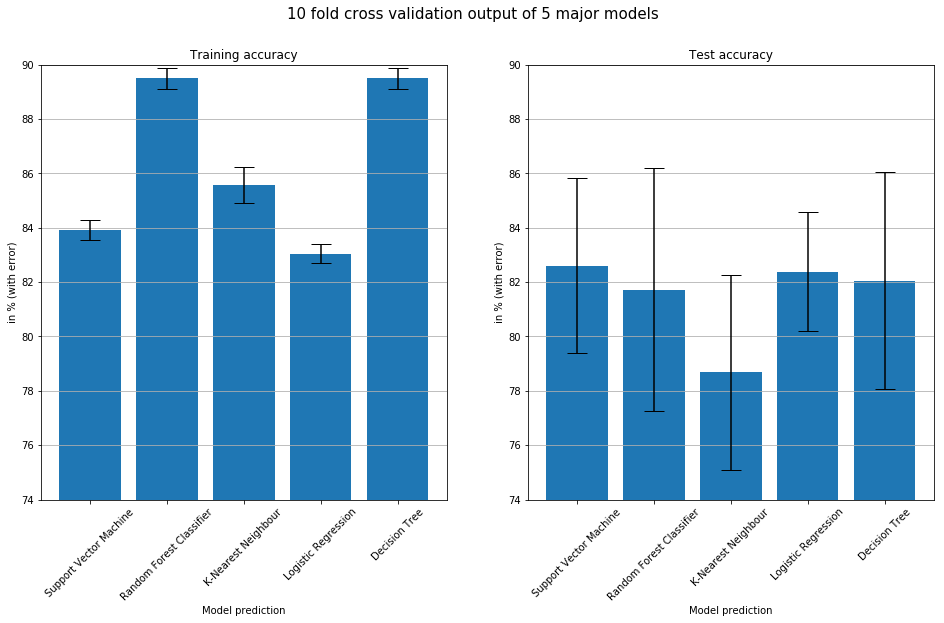

In [144]:
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(16,8))
ax.bar([name for name in Kfld_tr_acc.keys()], \
       [round(np.mean(Kfld_tr_acc[name]),2) for name in Kfld_tr_acc.keys()], \
       yerr=[round(np.std(Kfld_tr_acc[name]),2) for name in Kfld_tr_acc.keys()], \
       capsize = 10 \
       )
ax.set_xticklabels([name for name in Kfld_tr_acc.keys()], rotation=45)
ax.set_xlabel('Model prediction')
ax.set_ylim(74,90)
ax.yaxis.grid(True)
ax.set_ylabel('in % (with error)')
ax.set_title('Training accuracy')

ax2.bar([name for name in Kfld_ts_acc.keys()], \
       [round(np.mean(Kfld_ts_acc[name]),2) for name in Kfld_ts_acc.keys()], \
       yerr=[round(np.std(Kfld_ts_acc[name]),2) for name in Kfld_ts_acc.keys()], \
       capsize = 10 \
       )
ax2.set_xticklabels([name for name in Kfld_ts_acc.keys()], rotation=45)
ax2.set_xlabel('Model prediction')
ax2.set_ylim(74,90)
ax2.yaxis.grid(True)
ax2.set_ylabel('in % (with error)')
ax2.set_title('Test accuracy')

plt.suptitle("10 fold cross validation output of 5 major models", fontsize=15)

plt.show()

In [145]:
# Add all 10fold cv prediction from 5 ML 
Kfld_tr_allpred = [0 for _ in range(10)]
Kfld_ts_allpred = [0 for _ in range(10)]
for k in range(10):
    for name in Kfld_tr_pred.keys() :
        Kfld_tr_allpred[k] += Kfld_tr_pred[name][k] 
        Kfld_ts_allpred[k] += Kfld_ts_pred[name][k] 
        

In [146]:
# Find all accuracies
all_tracc = defaultdict(list); all_tsacc = defaultdict(list); 
for m in range(len(Indexes)) :
    for k in range(10):
        all_tracc[m].append(sum((Kfld_tr_allpred[k] > m) == Kfld_tr_act[k])/len(Kfld_tr_act[k]))
        all_tsacc[m].append(sum((Kfld_ts_allpred[k] > m) == Kfld_ts_act[k])/len(Kfld_ts_act[k]))
    print('*'*60)
    print('Case : Survived if more than {} model/s predicts it'.format(m))
    print('Training Accuracy : {} % +/- {} %'.format(round(np.mean(all_tracc[m])*100,2),round(np.std(all_tracc[m])*100,2)))
    print('Test Accuracy     : {} % +/- {} %'.format(round(np.mean(all_tsacc[m])*100,2),round(np.std(all_tsacc[m])*100,2)))
        

************************************************************
Case : Survived if more than 0 model/s predicts it
Training Accuracy : 84.22 % +/- 0.5 %
Test Accuracy     : 80.03 % +/- 3.17 %
************************************************************
Case : Survived if more than 1 model/s predicts it
Training Accuracy : 86.16 % +/- 0.39 %
Test Accuracy     : 82.27 % +/- 2.85 %
************************************************************
Case : Survived if more than 2 model/s predicts it
Training Accuracy : 88.42 % +/- 0.36 %
Test Accuracy     : 82.84 % +/- 3.32 %
************************************************************
Case : Survived if more than 3 model/s predicts it
Training Accuracy : 87.5 % +/- 0.4 %
Test Accuracy     : 82.61 % +/- 4.55 %
************************************************************
Case : Survived if more than 4 model/s predicts it
Training Accuracy : 85.21 % +/- 0.46 %
Test Accuracy     : 79.69 % +/- 3.86 %


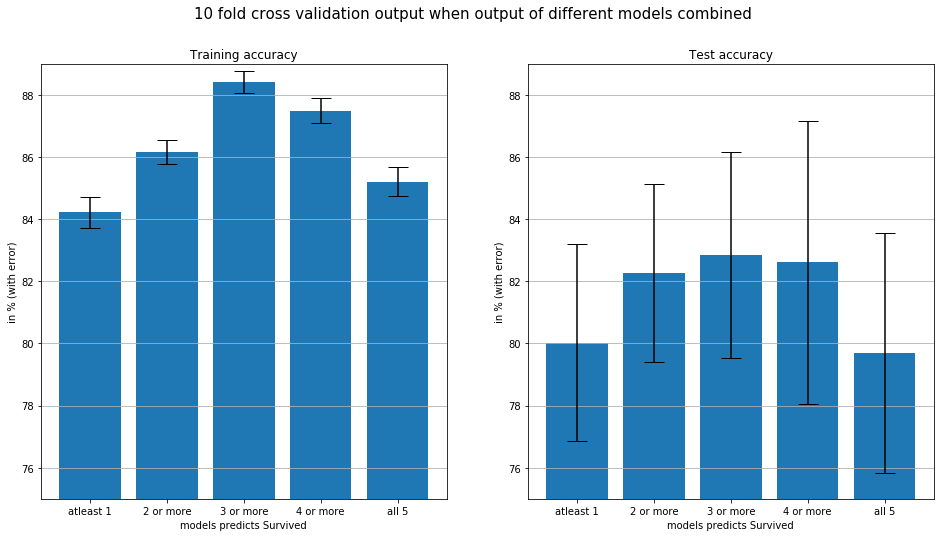

In [149]:
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(16,8))
ax.bar([m for m in range(len(Indexes))], \
       [round(np.mean(all_tracc[m])*100,2) for m in range(len(Indexes))], \
       yerr=[round(np.std(all_tracc[m])*100,2) for m in range(len(Indexes))], \
       capsize = 10 \
       )
ax.set_xticklabels([' ','atleast 1', '2 or more','3 or more', '4 or more' ,'all 5'])
ax.set_xlabel('models predicts Survived')
ax.set_ylim(75,89)
ax.yaxis.grid(True)
ax.set_ylabel('in % (with error)')
ax.set_title('Training accuracy')

ax2.bar([m for m in range(len(Indexes))], \
       [round(np.mean(all_tsacc[m])*100,2) for m in range(len(Indexes))], \
       yerr=[round(np.std(all_tsacc[m])*100,2) for m in range(len(Indexes))], \
       capsize = 10 \
       )
ax2.set_xticklabels([' ','atleast 1', '2 or more','3 or more', '4 or more' ,'all 5'])
ax2.set_xlabel('models predicts Survived')
ax2.set_ylim(75,89)
ax2.yaxis.grid(True)
ax2.set_ylabel('in % (with error)')
ax2.set_title('Test accuracy')

plt.suptitle("10 fold cross validation output when output of different models combined", fontsize=15)

plt.show()

In [156]:
# Final prediction
final_tr_pred = np.zeros(X_train.shape[0])
final_ts_pred = np.zeros(X_test.shape[0])
for ind,row in df_model_score.loc[Indexes,:].iterrows():
    name = row['Name']; key = row['key']
    _, _, tst_pred, _ \
                    = classifier(X_test, None, Model[name][key], parameters[name][key], mode ='predict')                
    final_ts_pred += tst_pred
    final_tr_pred += Train_prediction[name][key]

# Prediction is survived if 3 or more model has predicted it
final_tr_pred = 1*(final_tr_pred >= 3)
final_ts_pred = 1*(final_ts_pred >= 3)

In [160]:
# Final prediction - training accuracy 
print("Final training Accuracy is {} %".format(round(sum(final_tr_pred == Y_train)*100/Y_train.shape[0],2)))

Final training Accuracy is 88.1 %


In [170]:
# Final output for submission
df_test_label = pd.DataFrame({'PassengerId':df_titan_test['PassengerId'],'Survived':final_ts_pred})
df_test_label.to_csv("Titanic/Out01.csv",index=False)